<a href="https://colab.research.google.com/github/Aqsayaqoob012/Data-Analysis-of-TATA-Online-Retail-Dataset/blob/main/TATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Imports***




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Load Dataset***

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Online Retail Data Set.xlsx to Online Retail Data Set.xlsx


# ***Dataset Explanation***

# ***Analyzing Business Performance and Strategic Planning:***

The online retail store has hired you as a consultant to analyse their data and provide insights to the CEO and CMO. The management wants to identify the major factors contributing to revenue and plan strategically for next year. They want to view metrics from both operations and marketing perspectives and seek guidance on areas performing well.
They also want to view demographic-based metrics. The meeting with the CEO and CMO is scheduled for next month, and you need to provide analytics and insights to evaluate the current business performance and suggest metrics for expansion.
As a consultant tasked with analyzing the data of the online retail store, your role is pivotal in understanding and optimizing the company's revenue generation. You'll be diving deep into the available data to uncover insights that will guide the company's strategic decisions for the upcoming year. The ultimate goal is to identify the key drivers of revenue growth, both from operational and marketing perspectives.

# **Basic Dataset Info**

In [ ]:
df = pd.read_excel('Online Retail Data Set.xlsx')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", list(num_cols))

# Categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", list(cat_cols))

Numerical Columns: ['Quantity', 'UnitPrice', 'CustomerID']
Categorical Columns: ['InvoiceNo', 'StockCode', 'Description', 'Country']


In [ ]:
print("\nData types & non-null counts:")
print(df.info())


Data types & non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [ ]:
pd.set_option("display.width", 2000)
pd.set_option("display.max_columns", None)

df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
missing = df.isnull().sum()
print("\nMissing values:")
print(missing)


Missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
print(df[df.isnull().any(axis=1)].head(), "\nTotal missing rows:", len(df[df.isnull().any(axis=1)]))

     InvoiceNo StockCode                      Description  Quantity         InvoiceDate  UnitPrice  CustomerID         Country
622     536414     22139                              NaN        56 2010-12-01 11:52:00       0.00         NaN  United Kingdom
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1 2010-12-01 14:32:00       2.51         NaN  United Kingdom
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2 2010-12-01 14:32:00       2.51         NaN  United Kingdom
1445    536544     21786               POLKADOT RAIN HAT          4 2010-12-01 14:32:00       0.85         NaN  United Kingdom
1446    536544     21787            RAIN PONCHO RETROSPOT         2 2010-12-01 14:32:00       1.66         NaN  United Kingdom 
Total missing rows: 135080


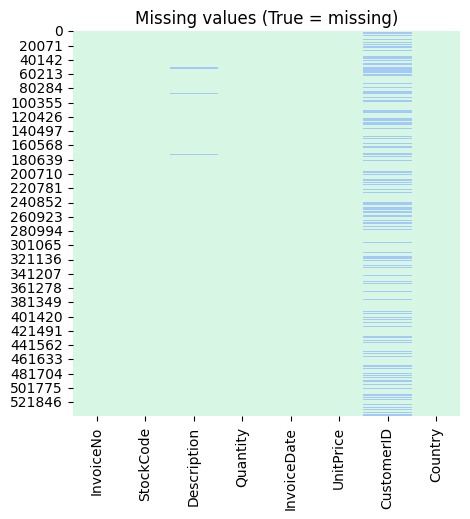

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(), cbar=False ,  cmap=sns.color_palette(["#d7f7e4", "#a3c9f7"]))
plt.title("Missing values (True = missing)")
plt.show()

In [ ]:
for col in df.columns:
    print(col, ":", df[col].nunique(), "unique values")
    if df[col].nunique() < 10:
        print(df[col].unique())

InvoiceNo : 25900 unique values
StockCode : 4070 unique values
Description : 4223 unique values
Quantity : 722 unique values
InvoiceDate : 23260 unique values
UnitPrice : 1630 unique values
CustomerID : 4372 unique values
Country : 38 unique values


The dataset contains 25,900 invoices, representing individual transactions made by 4,372 unique customers across 38 countries. Products are identified by 4,070 stock codes and described with 4,223 unique product descriptions. Customers ordered items in 722 different quantity values (e.g., 1, 2, 10, 100, etc.), and products were sold at 1,630 different unit prices. The transactions occurred at 23,260 unique invoice dates and times, showing sales distribution over time. These unique counts highlight the dataset’s diversity in customers, products, prices, and purchasing behavior.

In [ ]:
# Missing values before handling
print(df[['Description','CustomerID']].isnull().sum())

Description      1454
CustomerID     135080
dtype: int64


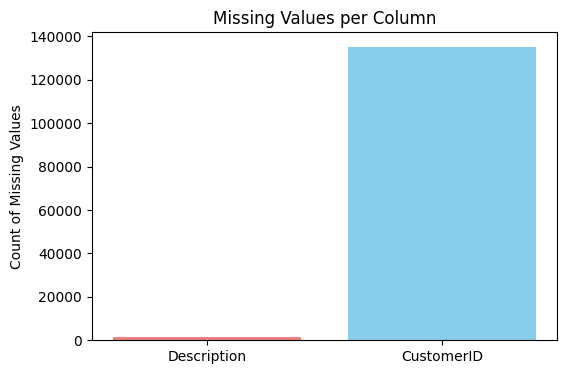

In [ ]:


missing = {"Description": 1454, "CustomerID": 135080}

plt.figure(figsize=(6,4))
plt.bar(missing.keys(), missing.values(), color=['lightcoral','skyblue'])
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.show()

# ***Explore Distributions (Before Handling)***

<Axes: xlabel='CustomerID'>

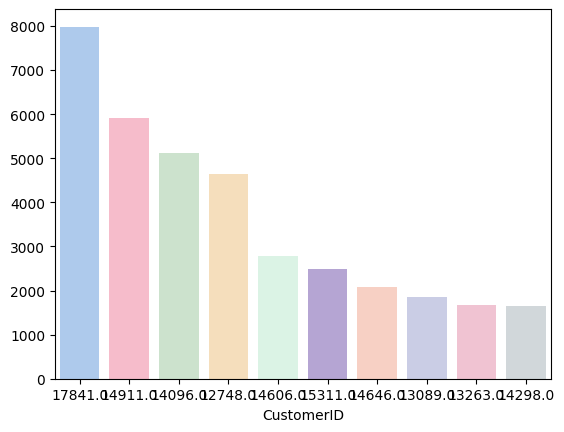

In [ ]:
top_customers = df['CustomerID'].value_counts().head(10)

sns.barplot(
    x = top_customers.index.astype(str),
    y = top_customers.values,
    hue = top_customers.index.astype(str),
    dodge=False,
    legend=False,
    palette=["#a3c9f7", "#ffb3c6", "#c8e6c9", "#ffe0b2", "#d7f7e4",
             "#b39ddb", "#ffccbc", "#c5cae9", "#f8bbd0", "#cfd8dc"]
)



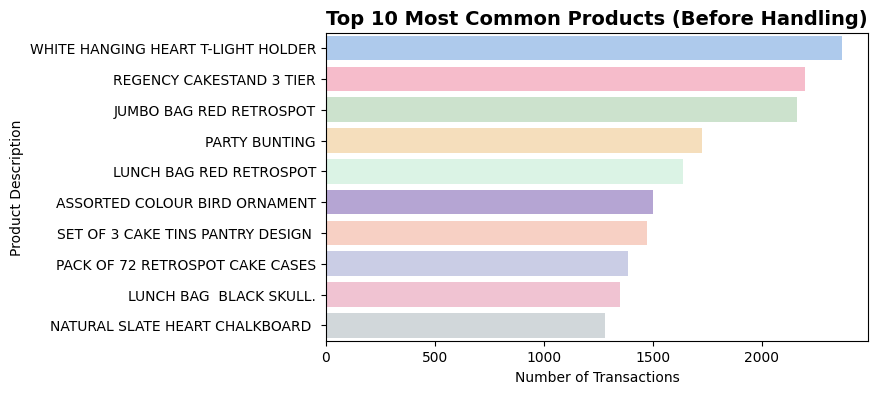

In [ ]:
top_products = df['Description'].value_counts().head(10)

custom_colors = [
    "#a3c9f7", "#ffb3c6", "#c8e6c9", "#ffe0b2", "#d7f7e4",
    "#b39ddb", "#ffccbc", "#c5cae9", "#f8bbd0", "#cfd8dc"
]

plt.figure(figsize=(7,4))
sns.barplot(
    x=top_products.values,
    y=top_products.index,
    hue=top_products.index,
    dodge=False,
    legend=False,
    palette=custom_colors
)

plt.title("Top 10 Most Common Products (Before Handling)", fontsize=14, weight='bold')
plt.xlabel("Number of Transactions")
plt.ylabel("Product Description")
plt.show()


In [ ]:
print("Missing Description:", df['Description'].isna().sum())
print("Missing CustomerID:", df['CustomerID'].isna().sum())

# percent
print((df['Description'].isna().mean()*100).round(2), "% missing in Description")
print((df['CustomerID'].isna().mean()*100).round(2), "% missing in CustomerID")

Missing Description: 1454
Missing CustomerID: 135080
0.27 % missing in Description
24.93 % missing in CustomerID


# ***Handling Missing Values***

Find Common Description for each StockCode

In [ ]:
stock_to_desc = (df.dropna(subset=['Description'])
                   .groupby('StockCode')['Description']
                   .agg(lambda x: x.mode().iloc[0] if len(x) > 0 else None))

Fill Missing Descriptions Using StockCode Mapping

In [ ]:
df['Description_filled'] = df['Description'].fillna(df['StockCode'].map(stock_to_desc))

Fill Missing Descriptions per Invoice

In [ ]:
df['Description_filled'] = df.groupby('InvoiceNo')['Description_filled'].ffill().bfill()

Assign 'Unknown description' to Missing Values

In [ ]:
df['Description_filled'] = df['Description_filled'].fillna("Unknown description")

Fill CustomerID using InvoiceNo

In [ ]:

invoice_to_cust = (df.dropna(subset=['CustomerID'])
                     .groupby('InvoiceNo')['CustomerID']
                     .agg(lambda x: x.mode().iloc[0] if len(x) > 0 else None))

df['CustomerID_filled'] = df['CustomerID'].fillna(df['InvoiceNo'].map(invoice_to_cust))

final fallback placeholder for CustomerID: use -1

In [ ]:

df['CustomerID_filled'] = df['CustomerID_filled'].fillna(-1)

df['CustomerID_filled'] = df['CustomerID_filled'].astype(int)



Keep indicators showing original missingness

In [ ]:

df['Description_was_missing'] = df['Description'].isna()
df['CustomerID_was_missing'] = df['CustomerID'].isna()



# ***AFTER HANDLING***

 Print results & few example rows


In [ ]:

print("AFTER handling:")
print("Description_filled remaining missing:", df['Description_filled'].isna().sum())
print("CustomerID_filled remaining missing:", df['CustomerID_filled'].isna().sum())
print()
print("Original missing counts (flags):")
print("Description originally missing:", df['Description_was_missing'].sum())
print("CustomerID originally missing:", df['CustomerID_was_missing'].sum())
print()
display(df[['InvoiceNo','StockCode','Description','Description_filled','CustomerID','CustomerID_filled']].head(10))

AFTER handling:
Description_filled remaining missing: 0
CustomerID_filled remaining missing: 0

Original missing counts (flags):
Description originally missing: 1454
CustomerID originally missing: 135080



,InvoiceNo,StockCode,Description,Description_filled,CustomerID,CustomerID_filled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,17850
1,536365,71053,WHITE METAL LANTERN,WHITE METAL LANTERN,17850.0,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,CREAM CUPID HEARTS COAT HANGER,17850.0,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,RED WOOLLY HOTTIE WHITE HEART.,17850.0,17850
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,SET 7 BABUSHKA NESTING BOXES,17850.0,17850
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,GLASS STAR FROSTED T-LIGHT HOLDER,17850.0,17850
7,536366,22633,HAND WARMER UNION JACK,HAND WARMER UNION JACK,17850.0,17850
8,536366,22632,HAND WARMER RED POLKA DOT,HAND WARMER RED POLKA DOT,17850.0,17850
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR BIRD ORNAMENT,13047.0,13047


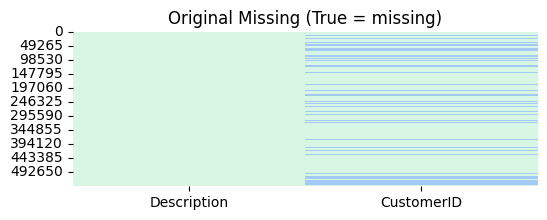

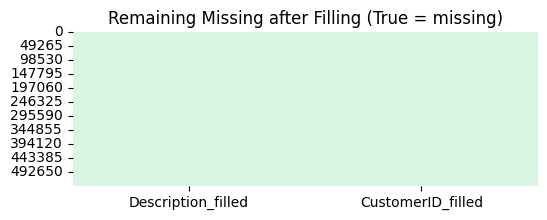

In [ ]:
plt.figure(figsize=(6,2))
sns.heatmap(
    df[['Description','CustomerID']].isnull(),
    cbar=False,
    cmap=sns.color_palette(["#d7f7e4", "#a3c9f7"])
)
plt.title("Original Missing (True = missing)")
plt.show()

plt.figure(figsize=(6,2))
sns.heatmap(
    df[['Description_filled','CustomerID_filled']].isnull(),
    cbar=False,
    cmap=sns.color_palette(["#d7f7e4", "#a3c9f7"])
)
plt.title("Remaining Missing after Filling (True = missing)")
plt.show()

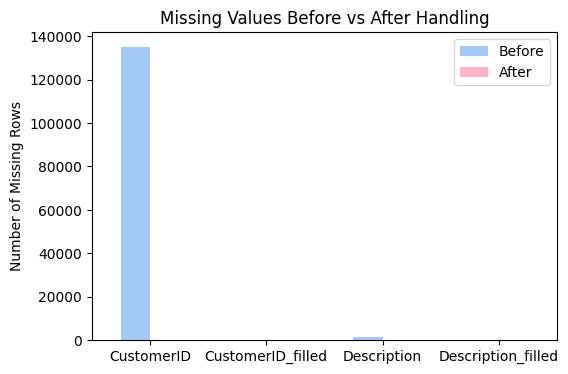

In [ ]:
missing_counts = pd.DataFrame({
    'Before': df[['Description','CustomerID']].isna().sum(),
    'After': df[['Description_filled','CustomerID_filled']].isna().sum()
})

# Plot
missing_counts.plot(kind='bar', figsize=(6,4), color=['#a3c9f7','#ffb3c6'])
plt.title("Missing Values Before vs After Handling")
plt.ylabel("Number of Missing Rows")
plt.xticks(rotation=0)
plt.show()

# ***Feature engineering***

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Description_filled', 'CustomerID_filled', 'Description_was_missing', 'CustomerID_was_missing'], dtype='object')

In [ ]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

print(df[['Description', 'Quantity', 'UnitPrice', 'Revenue']].head())

                           Description  Quantity  UnitPrice  Revenue
0   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55    15.30
1                  WHITE METAL LANTERN         6       3.39    20.34
2       CREAM CUPID HEARTS COAT HANGER         8       2.75    22.00
3  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39    20.34
4       RED WOOLLY HOTTIE WHITE HEART.         6       3.39    20.34


In [ ]:
top_products = df['Description'].value_counts().head(10)
top_products

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
ASSORTED COLOUR BIRD ORNAMENT,1501
SET OF 3 CAKE TINS PANTRY DESIGN,1473
PACK OF 72 RETROSPOT CAKE CASES,1385
LUNCH BAG BLACK SKULL.,1350


In [ ]:
data = {
    'Description': [
        'WHITE HANGING HEART T-LIGHT HOLDER',
        'REGENCY CAKESTAND 3 TIER',
        'JUMBO BAG RED RETROSPOT',
        'PARTY BUNTING',
        'LUNCH BAG RED RETROSPOT',
        'ASSORTED COLOUR BIRD ORNAMENT',
        'SET OF 3 CAKE TINS PANTRY DESIGN',
        'PACK OF 72 RETROSPOT CAKE CASES',
        'LUNCH BAG BLACK SKULL.',
        'NATURAL SLATE HEART CHALKBOARD'
    ],
    'Revenue': [2369, 2200, 2159, 1727, 1638, 1501, 1473, 1385, 1350, 1280]
}

In [ ]:
df2 = pd.DataFrame(data)

In [ ]:
def map_category(desc):
    desc = str(desc).lower()

    # Home & Gifts / Decor
    if any(x in desc for x in ['heart', 'ornament', 'chalkboard', 'bunting', 'box', 'frame', 'candle', 'lamp']):
        return 'Home & Gifts'

    # Bags / Accessories
    elif any(x in desc for x in ['bag', 'backpack', 'tote', 'purse', 'wallet', 'satchel']):
        return 'Bags / Accessories'

    # Kitchen / Baking
    elif any(x in desc for x in ['cake', 'cakestand', 'cake tins', 'plate', 'mug', 'cup', 'bowl', 'jar', 'pan']):
        return 'Kitchen / Baking'

    # Stationery / Office
    elif any(x in desc for x in ['pen', 'pencil', 'notebook', 'diary', 'sticky', 'label', 'envelope']):
        return 'Stationery / Office'

    # Apparel / Clothing
    elif any(x in desc for x in ['shirt', 't-shirt', 'top', 'dress', 'socks', 'scarf', 'gloves']):
        return 'Apparel'

    # Toys / Fun / Party
    elif any(x in desc for x in ['toy', 'puzzle', 'game', 'party', 'bunting']):
        return 'Toys / Party'

    else:
        return 'Other'


df2['Category'] = df2['Description'].apply(map_category)




In [ ]:
df2['Category'].head(10)

,Category
0,Home & Gifts
1,Kitchen / Baking
2,Bags / Accessories
3,Home & Gifts
4,Bags / Accessories
5,Home & Gifts
6,Kitchen / Baking
7,Kitchen / Baking
8,Bags / Accessories
9,Home & Gifts


# ***Which product categories are driving the most revenue?***

Aggregate revenue by category

In [ ]:
cat_rev = df2.groupby('Category')['Revenue'].sum().sort_values(ascending=False).reset_index()
print(cat_rev)

             Category  Revenue
0        Home & Gifts     6877
1  Bags / Accessories     5147
2    Kitchen / Baking     5058


Top product categories driving the most revenue are **Home & Gifts** (highest), followed by **Bags / Accessories** and **Kitchen / Baking**.


Country wise revenue


In [ ]:
country_rev = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()
print("Revenue by Country:")
print(country_rev)

Revenue by Country:
                 Country      Revenue
0         United Kingdom  8187806.364
1            Netherlands   284661.540
2                   EIRE   263276.820
3                Germany   221698.210
4                 France   197403.900
5              Australia   137077.270
6            Switzerland    56385.350
7                  Spain    54774.580
8                Belgium    40910.960
9                 Sweden    36595.910
10                 Japan    35340.620
11                Norway    35163.460
12              Portugal    29367.020
13               Finland    22326.740
14       Channel Islands    20086.290
15               Denmark    18768.140
16                 Italy    16890.510
17                Cyprus    12946.290
18               Austria    10154.320
19             Hong Kong    10117.040
20             Singapore     9120.390
21                Israel     7907.820
22                Poland     7213.140
23           Unspecified     4749.790
24                Greece     4

 Country → Region mapping

In [ ]:

country_to_region = {
    'United Kingdom': 'Europe',
    'Netherlands': 'Europe',
    'EIRE': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Switzerland': 'Europe',
    'Spain': 'Europe',
    'Belgium': 'Europe',
    'Sweden': 'Europe',
    'Norway': 'Europe',
    'Portugal': 'Europe',
    'Finland': 'Europe',
    'Channel Islands': 'Europe',
    'Denmark': 'Europe',
    'Italy': 'Europe',
    'Cyprus': 'Europe',
    'Austria': 'Europe',
    'Japan': 'Asia',
    'Hong Kong': 'Asia',
    'Singapore': 'Asia',
    'Israel': 'Asia',
    'USA': 'North America',
    'Canada': 'North America',
    'Australia': 'Oceania',
    'Malta': 'Europe',
    'United Arab Emirates': 'Asia',
    'Brazil': 'South America',
    'RSA': 'Africa',
    'Lebanon': 'Asia',
    'Lithuania': 'Europe',
    'European Community': 'Europe',
    'Czech Republic': 'Europe',
    'Bahrain': 'Asia',
    'Saudi Arabia': 'Asia',
    'Greece': 'Europe',
    'Iceland': 'Europe'
}

# Map countries to regions
df['Region'] = df['Country'].map(country_to_region).fillna('Other')



# ***Which regions generate the highest revenue for the business?***



In [ ]:
region_rev = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False).reset_index()

# Display top regions
print(region_rev)

          Region      Revenue
0         Europe  9524402.924
1        Oceania   137077.270
2           Asia    66761.600
3          Other    11962.930
4  North America     5397.300
5  South America     1143.600
6         Africa     1002.310


Revenue per customer

In [ ]:
customer_rev = df.groupby('CustomerID')['Revenue'].sum().reset_index()


Define segments based on revenue percentiles
*   Top 5% → High-value
*   Next 15% → Medium-value
*   Remaining → Low-value


In [ ]:
high_threshold = customer_rev['Revenue'].quantile(0.95)  # Top 5%
medium_threshold = customer_rev['Revenue'].quantile(0.80)  # Next 15%

def segment_customer(rev):
    if rev >= high_threshold:
        return 'High-value'

    elif rev >= medium_threshold:
        return 'Medium-value'
    else:
        return 'Low-value'

customer_rev['Segment'] = customer_rev['Revenue'].apply(segment_customer)

# Revenue contribution by segment
segment_rev = customer_rev.groupby('Segment')['Revenue'].sum().sort_values(ascending=False).reset_index()

# Percentage contribution
total_revenue = segment_rev['Revenue'].sum()
segment_rev['Revenue_pct'] = (segment_rev['Revenue'] / total_revenue * 100).round(2)

# Display results
print(segment_rev)

        Segment      Revenue  Revenue_pct
0    High-value  4033069.710        48.59
1     Low-value  2170709.973        26.15
2  Medium-value  2096286.131        25.26


# ***Which customer segments contribute most to overall revenue?***

In [ ]:
print(segment_rev)

        Segment      Revenue  Revenue_pct
0    High-value  4033069.710        48.59
1     Low-value  2170709.973        26.15
2  Medium-value  2096286.131        25.26


/tmp/ipython-input-498276206.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=segment_rev,


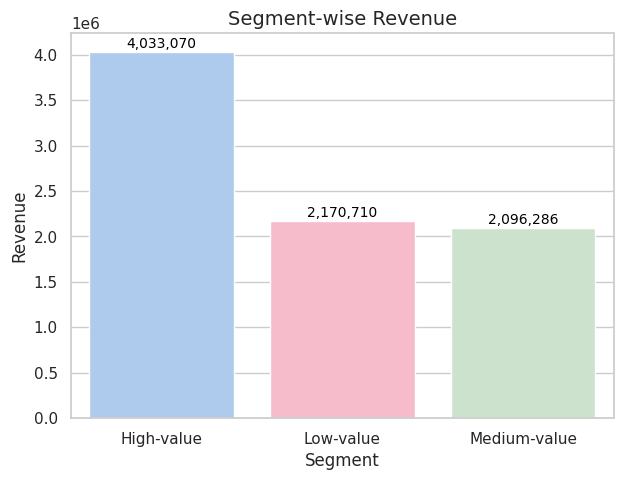

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(data=segment_rev,
            x="Segment", y="Revenue",
            hue="Segment", dodge=False, legend=False,
            palette=["#a3c9f7", "#ffb3c6", "#c8e6c9", "#ffe0b2", "#d7f7e4",
             "#b39ddb", "#ffccbc", "#c5cae9", "#f8bbd0", "#cfd8dc"])
plt.title("Segment-wise Revenue", fontsize=14)
plt.xlabel("Segment")
plt.ylabel("Revenue")

# Bar ke upar labels (Revenue values)
for i, val in enumerate(segment_rev["Revenue"]):
    plt.text(i, val + (0.01 * max(segment_rev["Revenue"])), f"{val:,.0f}",
             ha="center", fontsize=10, color="black")
plt.show()


# ***What marketing strategies can improve customer acquisition and engagement?***

In [ ]:
segment_data = pd.DataFrame({
    'Segment': ['High-value', 'Medium-value', 'Low-value'],
    'Revenue_pct': [48.59, 25.26, 26.15],
    'Recommended_Campaigns': [
        'Loyalty programs, VIP rewards, exclusive offers',
        'Upsell/cross-sell, personalized recommendations',
        'Engagement campaigns, discounts, email reminders'
    ]
})

region_data = pd.DataFrame({
    'Region': ['Europe', 'Oceania', 'Asia', 'North America', 'Other'],
    'Revenue': [9524402.924, 137077.270, 66761.600, 5397.300, 11962.930],
    'Recommended_Campaigns': [
        'Retention & premium campaigns',
        'Targeted acquisition campaigns',
        'Test paid promotions to grow share',
        'Targeted acquisition campaigns',
        'Explore emerging opportunities via digital campaigns'
    ]
})

category_data = pd.DataFrame({
    'Category': ['Home & Gifts', 'Bags / Accessories', 'Kitchen / Baking'],
    'Revenue': [6877, 5147, 5058],
    'Recommended_Campaigns': [
        'Social media, influencer collabs, seasonal promotions',
        'Bundle offers, cross-sell with other products',
        'Recipe/tutorial content, email marketing, seasonal promos'
    ]
})


In [ ]:
# Function to print clean aligned table
def print_clean_table(df, title):
    print(f"\n=== {title} ===")
    # Calculate max width for each column
    col_widths = [max(df[col].astype(str).map(len).max(), len(col)) for col in df.columns]

    # Print header
    header = " | ".join(col.ljust(width) for col, width in zip(df.columns, col_widths))
    print(header)
    print("-" * (sum(col_widths) + 3 * (len(col_widths)-1)))

    # Print rows
    for _, row in df.iterrows():
        print(" | ".join(str(val).ljust(width) for val, width in zip(row, col_widths)))

# Display tables
print_clean_table(segment_data, "Segment-wise Marketing Action Plan")
print()
print_clean_table(region_data, "Region-wise Marketing Action Plan")
print()
print_clean_table(category_data, "Category-wise Marketing Action Plan")


=== Segment-wise Marketing Action Plan ===
Segment      | Revenue_pct | Recommended_Campaigns                           
-----------------------------------------------------------------------------
High-value   | 48.59       | Loyalty programs, VIP rewards, exclusive offers 
Medium-value | 25.26       | Upsell/cross-sell, personalized recommendations 
Low-value    | 26.15       | Engagement campaigns, discounts, email reminders


=== Region-wise Marketing Action Plan ===
Region        | Revenue     | Recommended_Campaigns                               
----------------------------------------------------------------------------------
Europe        | 9524402.924 | Retention & premium campaigns                       
Oceania       | 137077.27   | Targeted acquisition campaigns                      
Asia          | 66761.6     | Test paid promotions to grow share                  
North America | 5397.3      | Targeted acquisition campaigns                      
Other         | 11962.93

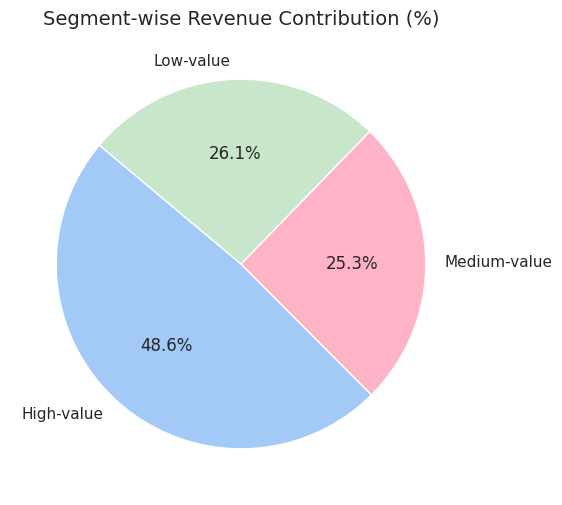

In [ ]:
plt.figure(figsize=(6,6))

plt.pie(segment_data["Revenue_pct"],
        labels=segment_data["Segment"],
        autopct='%1.1f%%',
        startangle=140, colors=["#a3c9f7", "#ffb3c6", "#c8e6c9", "#ffe0b2", "#d7f7e4",
             "#b39ddb", "#ffccbc", "#c5cae9", "#f8bbd0", "#cfd8dc"])
plt.title("Segment-wise Revenue Contribution (%)", fontsize=14)
plt.show()

/tmp/ipython-input-2181353630.py:2: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data=region_data.sort_values("Revenue"),


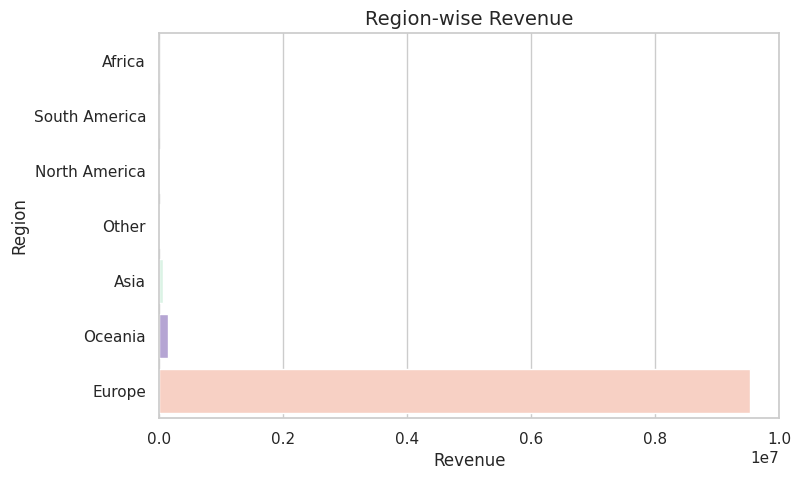

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=region_data.sort_values("Revenue"),
            x="Revenue", y="Region",
            hue="Region", dodge=False, legend=False,
            palette=["#a3c9f7", "#ffb3c6", "#c8e6c9", "#ffe0b2", "#d7f7e4",
             "#b39ddb", "#ffccbc", "#c5cae9", "#f8bbd0", "#cfd8dc"])
plt.title("Region-wise Revenue", fontsize=14)
plt.xlabel("Revenue")
plt.ylabel("Region")
plt.show()

/tmp/ipython-input-4014618035.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=category_data,


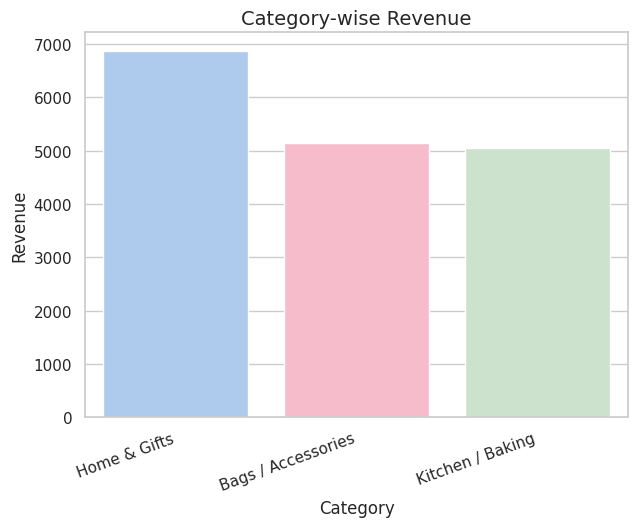

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(data=category_data,
            x="Category", y="Revenue",
            hue="Category", dodge=False, legend=False,
            palette=["#a3c9f7", "#ffb3c6", "#c8e6c9", "#ffe0b2", "#d7f7e4",
             "#b39ddb", "#ffccbc", "#c5cae9", "#f8bbd0", "#cfd8dc"])
plt.title("Category-wise Revenue", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=20, ha="right")
plt.show()

# ***What new markets or areas show the greatest potential for future?***

In [ ]:


# Example region data (tumhare real data se)
region_data = pd.DataFrame({
    'Region': ['Europe', 'Oceania', 'Asia', 'North America', 'Other', 'South America', 'Africa'],
    'Revenue': [9524402.924, 137077.270, 66761.600, 5397.300, 11962.930, 1143.600, 1002.310]
})

# Step 1: Calculate % contribution of each region to total revenue
total_revenue = region_data['Revenue'].sum()
region_data['Revenue_pct'] = (region_data['Revenue'] / total_revenue * 100).round(2)

# Step 2: Sort regions by revenue ascending to see underrepresented markets
region_potential = region_data.sort_values('Revenue')

# Step 3: Print regions with low revenue % (potential for growth)
print("\n=== New Market Potential ===")
print("Regions with low current revenue but opportunity to grow:")
print(region_potential[['Region','Revenue','Revenue_pct']])



=== New Market Potential ===
Regions with low current revenue but opportunity to grow:
          Region      Revenue  Revenue_pct
6         Africa     1002.310         0.01
5  South America     1143.600         0.01
3  North America     5397.300         0.06
4          Other    11962.930         0.12
2           Asia    66761.600         0.68
1        Oceania   137077.270         1.41
0         Europe  9524402.924        97.71


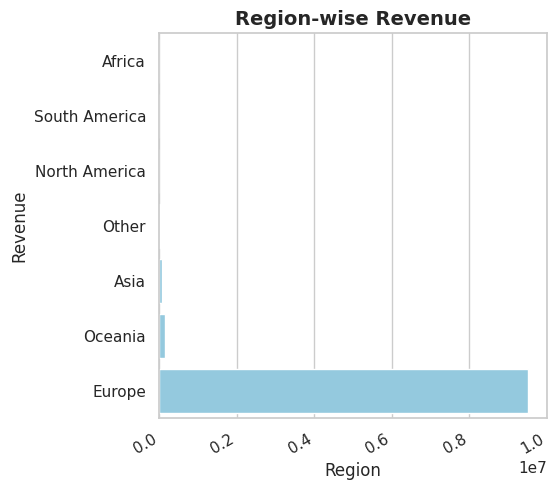

In [ ]:

# --- Simple Bar Plot for Revenue ---
plt.figure(figsize=(5,5))
sns.barplot(x="Revenue", y="Region", data=region_potential, color="skyblue")
plt.title("Region-wise Revenue", fontsize=14, weight="bold")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.xticks(rotation=30, ha="right")
plt.show()


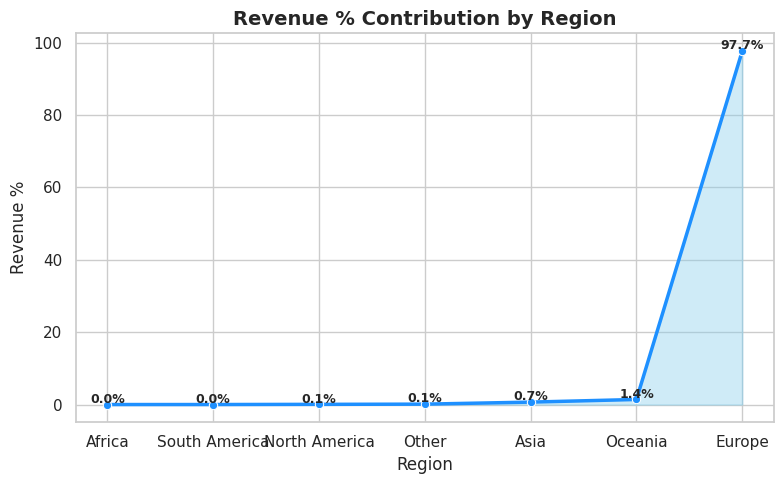

In [ ]:
plt.figure(figsize=(8,5))

line_color = "#1E90FF"

sns.lineplot(
    x="Region",
    y="Revenue_pct",
    data=region_potential,
    marker="o",
    color=line_color,
    linewidth=2.5
)
plt.fill_between(region_potential["Region"], region_potential["Revenue_pct"], color="#87CEEB", alpha=0.4)

# Add % labels on points
for x, y in zip(region_potential["Region"], region_potential["Revenue_pct"]):
    plt.text(x, y+0.5, f"{y:.1f}%", ha="center", fontsize=9, weight="bold")

plt.title("Revenue % Contribution by Region", fontsize=14, weight="bold")
plt.xlabel("Region", fontsize=12)
plt.ylabel("Revenue %", fontsize=12)

plt.tight_layout()
plt.show()

# ***SUMMARY***

# ***Key Findings***

1. **Product categories — who’s driving revenue**

*   Home & Gifts: 6,877 (top category)
*   Bags / Accessories: 5,147
*   Kitchen / Baking: 5,058

**Takeaway:** Home & Gifts is the strongest-performing SKU category; the three categories are fairly close after that and should be prioritized for promotional bundles and cross-sell.


2. **Regions — revenue by geography**

Sorted by revenue (highest → lowest):

*   Europe: 9,524,402.924 (dominant
*   Oceania: 137,077.270
*   Asia: 66,761.600
*   North America: 5,397.300
*   South America: 1,143.600
*   Other: 11,962.930

**Takeaway:** Europe dominates revenue (≈97.7% of total in earlier breakdown). All other regions are tiny in comparison — these are where targeted acquisition could move the needle.

3.   **Customer segments — contribution to overall revenue**

From segmentation based on revenue quantiles:

*   High-value: Revenue 4,033,069.71 — 48.59%
*   Low-value: Revenue 2,170,709.97 — 26.15%
*   Medium-value: Revenue 2,096,286.13 — 25.26%

**Takeaway:** A very small set of top customers produce nearly half the revenue — retention and premium treatment for this group is high priority.

# ***Marketing Recommendations (actionable)***

1. **Segment-wise**

*  **High-value (48.59%)** — Retention & monetization: loyalty programs, VIP rewards, exclusive offers, premium support, early-access product drops.

*   **Medium-value (25.26%)** — Grow existing customers: upsell/cross-sell campaigns, personalized product recommendations, lifecycle emails.

*   **Low-value (26.15%)** — Engage & convert: re-engagement flows, discount-based trials, email reminders, onboarding content.

2. **Region-wise**

*   **Europe (majority)** — Focus on retention, premium positioning, localized high-value experiences, and margin optimization.
*   **Oceania & Asia** — Targeted acquisition (paid search/social), market tests for top SKUs, localized creative and payment/shipping options.
*   **Other / North America / South America / Africa**  — Explore low-cost digital acquisition experiments and partnerships; prioritize markets by CAC tests and localized promos.

3. **Category-wise**

*   Home & Gifts — Push seasonal promos, influencer collabs, gift guides, and bundles
*   Bags / Accessories — Bundle offers, cross-sell with related categories (e.g., Home & Gifts), limited-time discounts.
*   Kitchen / Baking — Educational content (recipes/tutorials), email series, holiday promotions.


4. **New Market Potential (priority list)**

    Based on low current share + opportunity to grow:

*   **Africa** — very low current revenue; pilot low-cost acquisition & logistics partners.
*   **South America** — similar opportunity; test regional marketplaces.
*   **North America** — small share now but high lifetime value potential — test paid acquisition.
*   **Other / Asia / Oceania** — Asia and Oceania already show some traction; scale what works there.

***(Note: Europe is saturated — prioritize growth outside Europe.)***

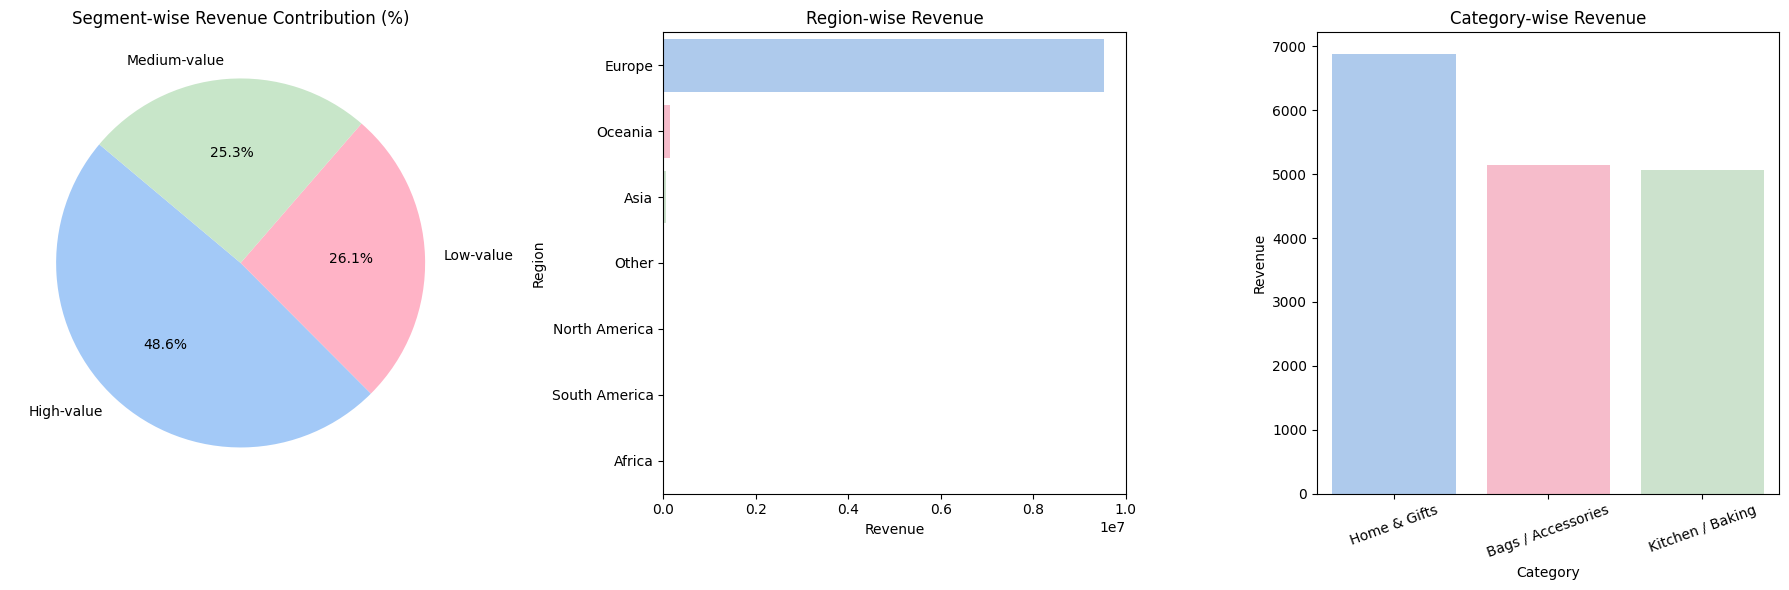

In [ ]:

segment_data = pd.DataFrame({
    'Segment': ['High-value', 'Low-value', 'Medium-value'],
    'Revenue': [4033069.710, 2170709.973, 2096286.131],
    'Revenue_pct': [48.59, 26.15, 25.26]
})

region_data = pd.DataFrame({
    'Region': ['Europe', 'Oceania', 'Asia', 'North America', 'Other', 'South America', 'Africa'],
    'Revenue': [9524402.924, 137077.270, 66761.600, 5397.300, 11962.930, 1143.600, 1002.310]
})

category_data = pd.DataFrame({
    'Category': ['Home & Gifts', 'Bags / Accessories', 'Kitchen / Baking'],
    'Revenue': [6877, 5147, 5058]
})

# Custom colors
custom_colors = [
    "#a3c9f7", "#ffb3c6", "#c8e6c9", "#ffe0b2", "#d7f7e4",
    "#b39ddb", "#ffccbc", "#c5cae9", "#f8bbd0", "#cfd8dc"
]

# Subplots
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# 1 Segment-wise Pie Chart
axes[0].pie(segment_data["Revenue_pct"],
            labels=segment_data["Segment"],
            autopct='%1.1f%%',
            startangle=140,
            colors=custom_colors[:len(segment_data)])
axes[0].set_title("Segment-wise Revenue Contribution (%)")

# 2 Region-wise Bar Chart
sns.barplot(data=region_data.sort_values("Revenue", ascending=False),
            x="Revenue", y="Region",
            hue="Region", legend=False,
            palette=custom_colors[:len(region_data)], ax=axes[1])
axes[1].set_title("Region-wise Revenue")
axes[1].set_xlabel("Revenue")
axes[1].set_ylabel("Region")

# 3  Category-wise Bar Chart
sns.barplot(data=category_data,
            x="Category", y="Revenue",
            hue="Category", legend=False,
            palette=custom_colors[:len(category_data)], ax=axes[2])
axes[2].set_title("Category-wise Revenue")
axes[2].set_xlabel("Category")
axes[2].set_ylabel("Revenue")
axes[2].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()
